# Supervised Learning with Feedforward Neural Networks

Supervised learning is one of the foundational ideas in machine learning. If you've heard of machine learning before, chances are you're thinking of this type. In supervised learning, the key idea is that we teach a model by example.

We start with a dataset that includes both inputs (also called *features*) and the corresponding outputs (also called *labels* or *targets*). The goal is to learn the relationship between the inputs and outputs so that, when we're later given a new input, the model can correctly predict the output.

Imagine a few concrete examples:
- You have thousands of images of handwritten digits, and each image is labeled with the correct digit (0 through 9). You want your model to learn how to read digits, so it can correctly classify new, unlabeled images.
- You have a dataset of house features (square footage, number of bedrooms, location, etc.) and the prices those houses sold for. You want to predict the sale price of a new house.
- You have audio clips and the corresponding transcripts. You want to build a system that listens to an audio clip and transcribes the words.

In all these cases, we're learning from examples with known answers—that's why it's called *supervised* learning. We’re supervising the model by telling it the correct answer during training.

## What Does the Model Learn?

The job of a supervised learning model is to discover patterns in the training data—patterns that connect inputs to outputs. The more representative and diverse the training data is, the better the model will be at generalizing to new, unseen examples.

One common type of supervised learning model is the **feedforward neural network**. This kind of model mimics, in a very simplified way, the way biological neurons work. Information flows through the network in one direction—from input to output—passing through layers of artificial “neurons” that apply weighted transformations and nonlinear functions.

During training, the network adjusts its internal weights to minimize the difference between its predictions and the true outputs. This process is called *learning*, and it's usually done using a method called *gradient descent*, combined with an algorithm called *backpropagation* that efficiently computes how the weights should be updated.

## Two Major Subtypes: Classification and Regression

There are two broad categories of problems in supervised learning, and knowing the difference is crucial:

- **Classification:** Here, the outputs are *discrete categories*. The goal is to assign an input to one of a fixed set of categories. For example:
  - Is this tumor benign or malignant?
  - What digit is in this image?
  - Which particle is observed in this experiment?

  In these problems, the output is often represented as a one-hot vector—an array where only one element is “on” (e.g., `[0, 0, 1, 0]` for class 2).

- **Regression:** In these problems, the output is a *continuous value*. You're predicting something that varies smoothly. For example:
  - What is the temperature in Boston tomorrow?
  - What is the energy of a particle given its momentum?
  - How much will this apartment rent for?

  In regression, the model’s outputs are real numbers, and the performance is often measured by metrics like mean squared error.


# Supervised Learning Demo with scikit-learn

In this notebook, we'll use Python's `scikit-learn` library to perform supervised learning on a classic dataset: the handwritten digits dataset.

We’ll:
- Load a dataset of labeled examples (images of digits)
- Train a model to recognize the digits
- Evaluate its accuracy
- Visualize the results

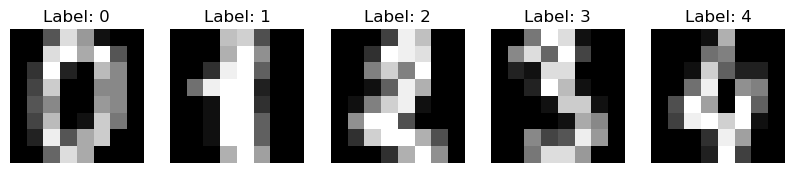

In [1]:
# Import libraries
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Load the digits dataset
digits = load_digits()
X, y = digits.data, digits.target

# Show some example images
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(f"Label: {digits.target[i]}")
    ax.axis('off')
plt.show()


## Step 1: Split the Data

We'll divide the data into a **training set** and a **test set**. The model will learn from the training set and be evaluated on the test set.


In [3]:
# Split into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Step 2: Train a Model

We'll use logistic regression, a simple but effective classifier, to train the model on the training dat

Some other classifiers include Support Vector Machine (SVM), K-Nearest Neighbors (KNN), and Random Forest.a.


In [7]:
# Train a logistic regression model
model = LogisticRegression(max_iter=5000)  # max_iter increased to ensure convergence
model.fit(X_train, y_train)


LogisticRegression(max_iter=5000)

## Step 3: Make Predictions and Evaluate

Let’s see how well our model does on the test data.


In [9]:
# Make predictions
y_pred = model.predict(X_test)

# Check accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Show a detailed classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.9722222222222222
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       0.97      1.00      0.99        33
           3       0.97      0.97      0.97        34
           4       1.00      0.98      0.99        46
           5       0.92      0.94      0.93        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.97      0.97      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



In [11]:
y_pred

array([6, 9, 3, 7, 2, 1, 5, 2, 5, 2, 1, 9, 4, 0, 4, 2, 3, 7, 8, 8, 4, 3,
       9, 7, 5, 6, 3, 5, 6, 3, 4, 9, 1, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3,
       6, 1, 3, 0, 6, 5, 5, 1, 3, 5, 6, 0, 9, 0, 0, 1, 0, 4, 5, 2, 4, 5,
       7, 0, 7, 5, 9, 5, 5, 4, 7, 0, 4, 5, 5, 9, 9, 0, 2, 3, 8, 0, 6, 4,
       4, 9, 1, 2, 8, 3, 5, 2, 9, 0, 4, 4, 4, 3, 5, 3, 1, 3, 5, 9, 4, 2,
       7, 7, 4, 4, 1, 9, 2, 7, 8, 7, 2, 6, 9, 4, 0, 7, 2, 7, 5, 8, 7, 5,
       7, 5, 0, 6, 6, 4, 2, 8, 0, 9, 4, 6, 9, 9, 6, 9, 0, 5, 5, 6, 6, 0,
       6, 4, 3, 9, 3, 8, 7, 2, 9, 0, 4, 5, 3, 6, 5, 9, 9, 8, 4, 2, 1, 3,
       7, 7, 2, 2, 3, 9, 8, 0, 3, 2, 2, 5, 6, 9, 9, 4, 1, 2, 4, 2, 3, 6,
       4, 8, 5, 9, 5, 7, 8, 9, 4, 8, 1, 5, 4, 4, 9, 6, 1, 8, 6, 0, 4, 5,
       2, 7, 1, 6, 4, 5, 6, 0, 3, 2, 3, 6, 7, 1, 9, 1, 4, 7, 6, 5, 8, 5,
       5, 1, 5, 2, 8, 8, 9, 9, 7, 6, 2, 2, 2, 3, 4, 8, 8, 3, 6, 0, 9, 7,
       7, 0, 1, 0, 4, 5, 1, 5, 3, 6, 0, 4, 1, 0, 0, 3, 6, 5, 9, 7, 3, 5,
       5, 9, 9, 8, 5, 3, 3, 2, 0, 5, 8, 3, 4, 0, 2,

## Step 4: Visualize Predictions

Let's look at some test images alongside the model's predictions.


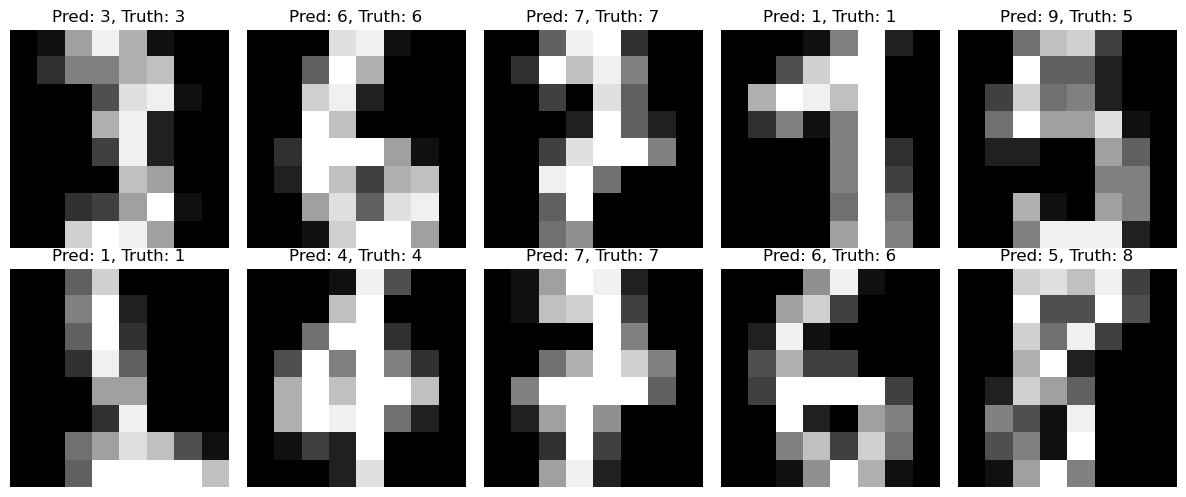

In [17]:
# Plot 10 test images with their predicted labels
offset = 230
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(X_test[i+offset].reshape(8, 8), cmap='gray')
    ax.set_title(f"Pred: {y_pred[i+offset]}, Truth: {y_test[i+offset]}")
    ax.axis('off')
plt.tight_layout()
plt.show()


# From scikit-learn to PyTorch

So far, we've used `scikit-learn`, a powerful and beginner-friendly library for supervised learning. It abstracts away many of the technical details, allowing us to train and evaluate models with just a few lines of code. This makes it ideal for quickly applying standard algorithms like logistic regression, decision trees, or support vector machines.

However, if we want to dive deeper—especially into neural networks and deep learning—we need more flexibility and control. That's where `PyTorch` comes in. PyTorch allows us to build models from scratch, define custom architectures, and see exactly how data flows through the network. It requires a bit more setup, but it gives us full access to the inner workings of training algorithms.

Let’s now shift to using PyTorch to build and train a simple feedforward neural network on the same digits dataset.


## Classifying Digits with PyTorch: Step-by-Step

Now that we've used `scikit-learn` for supervised learning, let’s walk through how to build and train a neural network from scratch using PyTorch. We’ll use the same digits dataset and mirror the steps we followed earlier.

---

### Step 1: Load and Preprocess the Data

We’ll load the digits dataset, normalize the features, and convert everything into tensors. Pytorch Tensors are the base datatype used to analyze and pass data in tensors.ensors.


In [19]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
from torch.utils.data import TensorDataset, DataLoader

# Load the dataset
digits = load_digits()
X, y = digits.data, digits.target

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Create PyTorch datasets and loaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64)


In [21]:
X_train_tensor

tensor([[ 0.0000, -0.3350, -0.4638,  ...,  1.0571,  0.4725, -0.1960],
        [ 0.0000, -0.3350,  0.7984,  ..., -0.6381, -0.5057, -0.1960],
        [ 0.0000, -0.3350, -1.0949,  ..., -0.1295, -0.5057, -0.1960],
        ...,
        [ 0.0000, -0.3350,  0.7984,  ...,  1.5657, -0.0166, -0.1960],
        [ 0.0000, -0.3350, -0.8846,  ..., -1.1466, -0.5057, -0.1960],
        [ 0.0000, -0.3350, -0.8846,  ..., -0.9771, -0.5057, -0.1960]])

---

### Step 2: Define the Neural Network

We’ll use a simple feedforward architecture with one hidden layer and ReLU activation.


In [25]:
import torch.nn as nn

class DigitClassifier(nn.Module):
    def __init__(self):
        super(DigitClassifier, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(64, 100),  # 64 input features
            nn.ReLU(),
            nn.Linear(100, 10)   # 10 output classes
        )

    def forward(self, x):
        return self.net(x)

model = DigitClassifier()

---

### Step 3: Set Up the Loss Function and Optimizer

We'll use cross-entropy loss for classification, and the Adam optimizer for train The cross-entropy loss is used in classification schemes, especially when the model outputs probabilities. It measures the difference between two probability distributions: the true labels and the predicted probabilities of the model. If the model assigns high probability to the correct answer, the loss is small. If the model assigns low probability to the correct class, the loss is large, punishing confident wrong answer more harshly.ing.


In [27]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)


---

### Step 4: Train the Model

We’ll loop over the training data for several epochs, computing the loss and updating the weights using backpropagation.


Epoch 1/20, Loss: 17.0130
Epoch 2/20, Loss: 2.3297
Epoch 3/20, Loss: 1.1471
Epoch 4/20, Loss: 0.5218
Epoch 5/20, Loss: 0.2973
Epoch 6/20, Loss: 0.1693
Epoch 7/20, Loss: 0.1151
Epoch 8/20, Loss: 0.1032
Epoch 9/20, Loss: 0.0971
Epoch 10/20, Loss: 0.0563
Epoch 11/20, Loss: 0.0429
Epoch 12/20, Loss: 0.0344
Epoch 13/20, Loss: 0.0280
Epoch 14/20, Loss: 0.0239
Epoch 15/20, Loss: 0.0213
Epoch 16/20, Loss: 0.0200
Epoch 17/20, Loss: 0.0177
Epoch 18/20, Loss: 0.0162
Epoch 19/20, Loss: 0.0149
Epoch 20/20, Loss: 0.0134


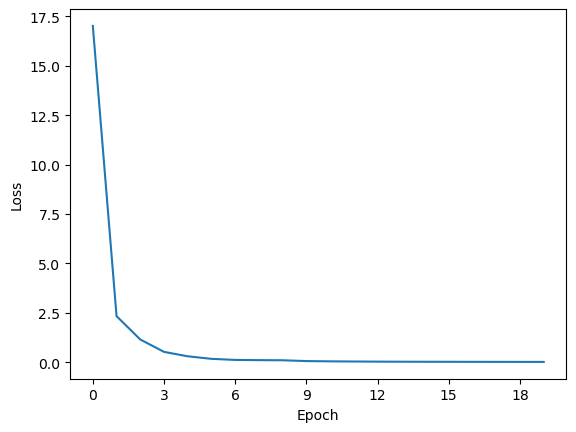

In [29]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

epochs = 20
lossacct = []
for epoch in range(epochs):
    
    model.train()
    total_loss = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss:.4f}")
    lossacct.append(total_loss)

fig, ax = plt.subplots()
ax.plot(lossacct)
plt.xlabel('Epoch')
plt.ylabel('Loss')
# Force integer ticks on the x-axis
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

---

### Step 5: Evaluate the Model

Let’s measure accuracy on the test set.


In [31]:
model.eval()
correct = 0
total = 0
all_preds = []
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        _, predicted = torch.max(outputs, 1)
        total += y_batch.size(0)
        correct += (predicted == y_batch).sum().item()
        all_preds.extend(predicted.cpu().numpy())

print(f"Test Accuracy: {correct / total:.2%}")


Test Accuracy: 97.78%


---

### Step 6: Visualize Predictions

We'll look at a few test samples and their predicted labels.


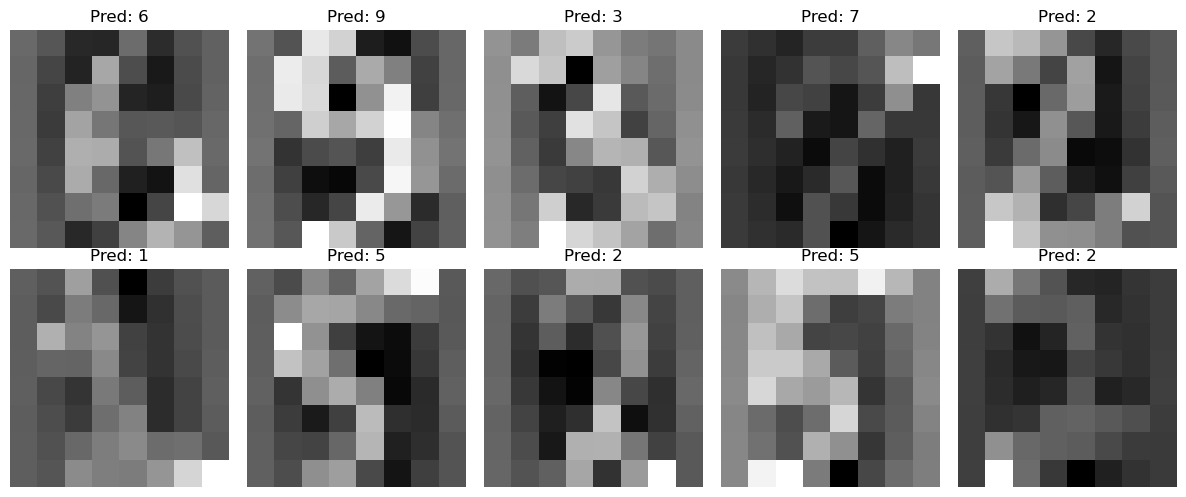

In [33]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(X_test[i].reshape(8, 8), cmap='gray')
    ax.set_title(f"Pred: {all_preds[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()


In [35]:
print(model)

DigitClassifier(
  (net): Sequential(
    (0): Linear(in_features=64, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=10, bias=True)
  )
)


In [37]:
for name, param in model.named_parameters():
    print(f"{name}: {param.shape}")

net.0.weight: torch.Size([100, 64])
net.0.bias: torch.Size([100])
net.2.weight: torch.Size([10, 100])
net.2.bias: torch.Size([10])


In [39]:
# Access the weights of the first layer
input_weights = model.net[0].weight.data
print(input_weights)

# Biases of the output layer
output_bias = model.net[2].bias.data
print(output_bias)

tensor([[ 0.0343, -0.0601, -0.0417,  ..., -0.0930, -0.1648, -0.0088],
        [-0.0071, -0.0167,  0.2488,  ..., -0.1095, -0.2832, -0.0010],
        [-0.0119,  0.0073, -0.0565,  ..., -0.1534, -0.0430, -0.0238],
        ...,
        [-0.0005,  0.0850,  0.1995,  ...,  0.0627,  0.1855,  0.1681],
        [ 0.0873,  0.2389,  0.0692,  ...,  0.2721,  0.2081,  0.0847],
        [ 0.0918, -0.2215,  0.0294,  ..., -0.1864, -0.1743, -0.2038]])
tensor([-0.0471, -0.1268,  0.0254, -0.0538, -0.0362,  0.0032, -0.0847, -0.0814,
         0.1743,  0.0629])


In [41]:
num_params = sum(p.numel() for p in model.parameters())
print(f"Total parameters: {num_params}")

Total parameters: 7510


# Regression: $Z \to e^+ e^-$ decays

In this problem we'll use CERN OpenData taken from the website [opendata.cern.ch](http://opendata.cern.ch/record/545) to train a classifier to distinguish between $Z \to e^+ e^-$ decays and background events. The data is stored in the file `Zee.csv` and contains the following variables:
- `E1`, `E2`: The energy of the two electrons in GeV
- `pt1`, `pt2`: The transverse momentum of the two electrons in GeV
- `eta1`, `eta2`: The pseudorapidity of the two electrons
- `phi1`, `phi2`: The azimuthal angle of the two electrons
and some other data that won't be as relevant for us.

We will train a neural network to predict the invariant mass of the Z-boson from the transverse momenta `pt`, the pseudo-rapidities `eta` and the azimuthal angles `phi` of the electron and positron. The pseudo-rapidity is given by
$$\eta = -\ln(\tan(\theta/2))$$
where $\theta$ is the angle between the particle's momentum and the beam axis.
Of course, the exact formula for the invariant mass is known, but this is useful pedagogically because it will give us some confidence in the neural network.

In terms of these variables, the formula for the reconstructed invariant mass of the $Z$-boson is 
$M_Z^2 = 2 p_{T,1} p_{T,2} ( \cosh(\eta_1 - \eta_2) - \cos(\phi_1 - \phi_2))$.


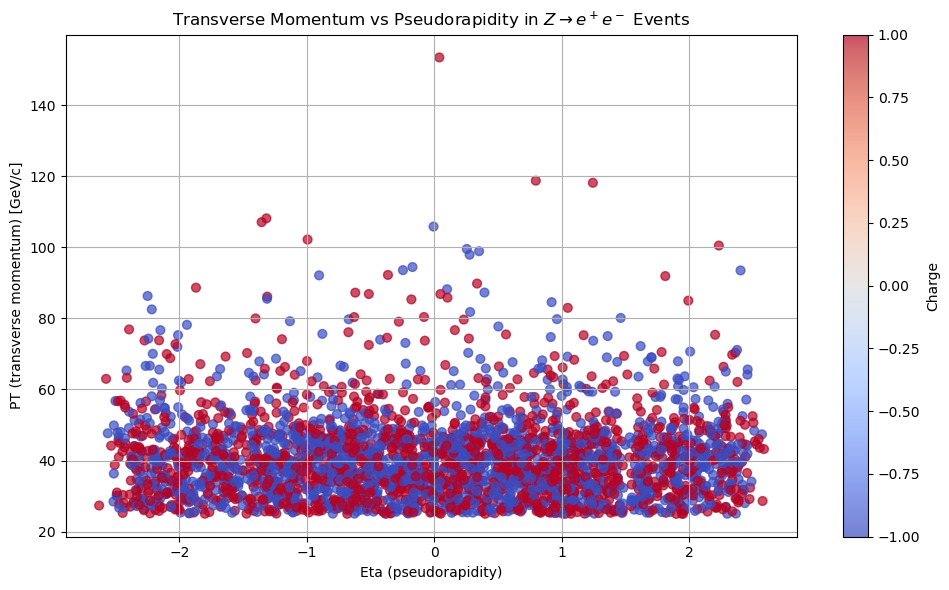

PT range: 25.00 to 153.39 GeV/c
Eta range: -2.63 to 2.59


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# Load the data
data = pd.read_csv('Zee.csv')

# Combine electron and positron kinematics into one DataFrame
particles = pd.DataFrame({
    'pt': pd.concat([data['pt1'], data['pt2']]),
    'eta': pd.concat([data['eta1'], data['eta2']]),
    'charge': pd.concat([data['Q1'], data['Q2']])
})

# Randomly select 1000 particles
random_indices = random.sample(range(len(particles)), 3000)
sample_data = particles.iloc[random_indices]

# Create a 2D scatter plot of pt vs eta
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    sample_data['eta'],
    sample_data['pt'],
    c=sample_data['charge'],
    cmap='coolwarm',
    alpha=0.7,
    s=40
)

# Labels and title
plt.xlabel('Eta (pseudorapidity)')
plt.ylabel('PT (transverse momentum) [GeV/c]')
plt.title('Transverse Momentum vs Pseudorapidity in $Z \\rightarrow e^+e^-$ Events')

# Colorbar to show charge
cbar = plt.colorbar(scatter)
cbar.set_label('Charge')

plt.grid(True)
plt.tight_layout()
plt.show()

# Print simple statistics
print(f"PT range: {sample_data['pt'].min():.2f} to {sample_data['pt'].max():.2f} GeV/c")
print(f"Eta range: {sample_data['eta'].min():.2f} to {sample_data['eta'].max():.2f}")


-----------
## Step 1: Load and Prepare the data 
We'll load teh data from `Zee.csv`, extract the features, and compute the invariant mass from the exact formula to use as our target variable.

In [45]:
import pandas as pd
import numpy as np
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Zee.csv')

# Select kinematic variables
features = ['pt1', 'pt2', 'eta1', 'eta2', 'phi1', 'phi2']
X = df[features].values

# Compute the invariant mass using the given formula
pt1, pt2 = df['pt1'], df['pt2']
eta1, eta2 = df['eta1'], df['eta2']
phi1, phi2 = df['phi1'], df['phi2']

mass_squared = 2 * pt1 * pt2 * (np.cosh(eta1 - eta2) - np.cos(phi1 - phi2))
mass = np.sqrt(np.abs(mass_squared))  # abs to prevent tiny negatives from sqrt

y = mass.values.reshape(-1, 1)
print(y)


[[89.59067659]
 [92.25220284]
 [67.85905002]
 ...
 [85.12359807]
 [90.42726071]
 [82.89370074]]


------------
## Step 2: Normalize the inputs
We normalize the input features using `StandardScaler` to have zero mean and unit variance. This helps the neural network train faster and more reliably.

In [49]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Wrap in DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64)


-----------
## Step 3: Define the Neural Network
We'll use a simple feedforward netowrk with two hidden layers. Since this is a regression problem, the output layer has a single neuron with no activation function. 

In [51]:
import torch.nn as nn

class ZMassRegressor(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(6, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)  # Output: predicted mass
        )

    def forward(self, x):
        return self.net(x)

model = ZMassRegressor()


-------
## Step 4: Set Up the Loss Function and Optimizer
We'll use Mean Square Error (MSE) as the loss, which is standard for regression problems. The Adam opitmizer will update weights.

In [53]:
import torch.optim as optim

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


-----
## Step 5: Train the Model
Fro each epoc, we loop over training batches, perform forward and backward passes, and update weights to minimize the loss.

In [55]:
epochs = 100
train_losses = []

for epoch in range(epochs):
    model.train()
    epoch_loss = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    
    avg_loss = epoch_loss / len(train_loader)
    train_losses.append(avg_loss)
    if epoch % 10 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}")


Epoch 1/100, Loss: 6671.0156
Epoch 11/100, Loss: 97.3880
Epoch 21/100, Loss: 41.3093
Epoch 31/100, Loss: 23.2872
Epoch 41/100, Loss: 18.5340
Epoch 51/100, Loss: 16.3359
Epoch 61/100, Loss: 14.7071
Epoch 71/100, Loss: 13.1507
Epoch 81/100, Loss: 10.9537
Epoch 91/100, Loss: 8.4528


## Step 6: Evaluate the Model
Now we compare the predicted masses to the true masses on the test set.

In [57]:
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor).numpy()

# Flatten for plotting
y_true = y_test.flatten()
y_pred_flat = y_pred.flatten()


-------
## Step 7: Visualize Predictions
Let's compare true and predicted invariant masses with a scatter plot. A perfect prediction would fall on the diagonal.

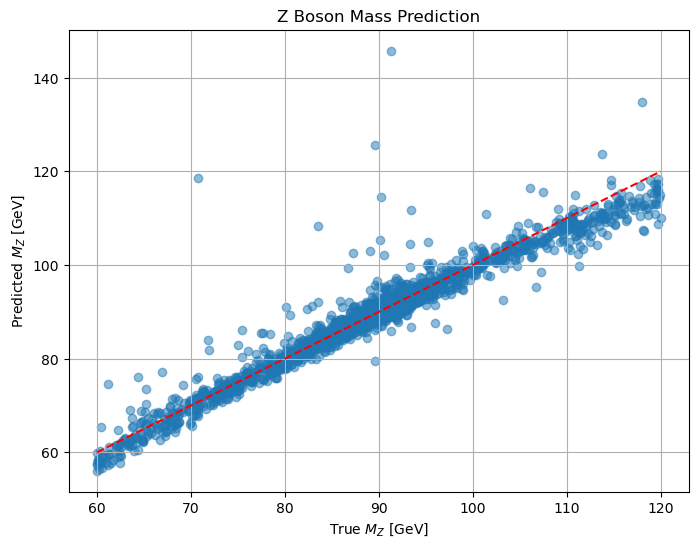

In [59]:
plt.figure(figsize=(8, 6))
plt.scatter(y_true, y_pred_flat, alpha=0.5)
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
plt.xlabel("True $M_Z$ [GeV]")
plt.ylabel("Predicted $M_Z$ [GeV]")
plt.title("Z Boson Mass Prediction")
plt.grid(True)
plt.show()


## Step 8: Plot Training Loss

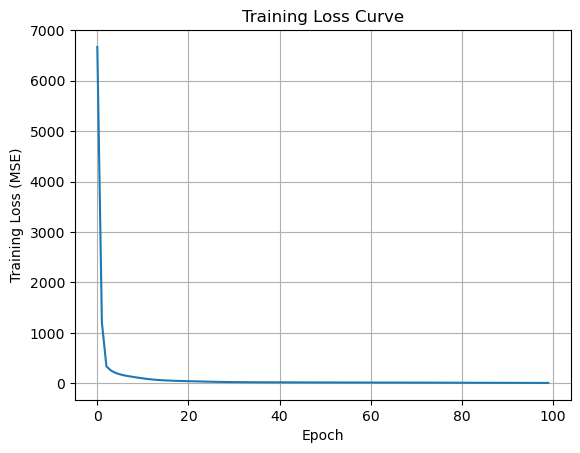

In [61]:
plt.plot(train_losses)
plt.xlabel("Epoch")
plt.ylabel("Training Loss (MSE)")
plt.title("Training Loss Curve")
plt.grid(True)
plt.show()


## Learning about the Model
Since our model takes 6 input variables, we cannot plot the learned function in 2D. But we can fix all but one or two of the inputs and see how the predicted mass depends on those features.

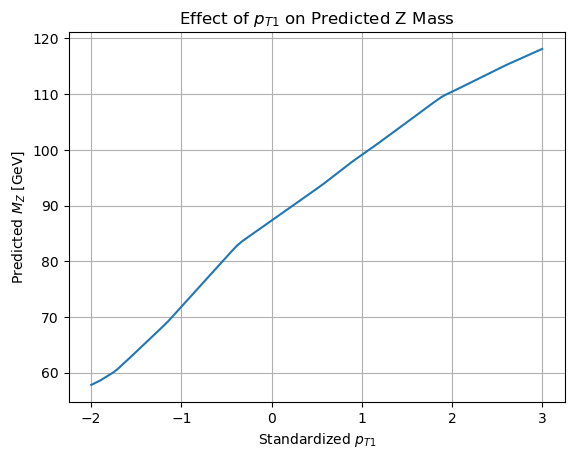

In [63]:
import numpy as np

# Fix all inputs except pt1
baseline = X_test_tensor[0].clone().numpy()
pt1_range = np.linspace(-2, 3, 100)  # Still in standardized units

# Vectorized creation of inputs
inputs_array = np.tile(baseline, (len(pt1_range), 1))
inputs_array[:, 0] = pt1_range  # Replace pt1 with values from range

# Now convert efficiently to torch tensor
inputs_tensor = torch.tensor(inputs_array, dtype=torch.float32)

# Predict
model.eval()
with torch.no_grad():
    predictions = model(inputs_tensor).numpy().flatten()

# Plot
plt.plot(pt1_range, predictions)
plt.xlabel("Standardized $p_{T1}$")
plt.ylabel("Predicted $M_Z$ [GeV]")
plt.title("Effect of $p_{T1}$ on Predicted Z Mass")
plt.grid(True)
plt.show()


## Inspecting Model Weights

In [65]:
# Print all parameter names and shapes
for name, param in model.named_parameters():
    print(f"{name}: {param.shape}")


net.0.weight: torch.Size([64, 6])
net.0.bias: torch.Size([64])
net.2.weight: torch.Size([32, 64])
net.2.bias: torch.Size([32])
net.4.weight: torch.Size([1, 32])
net.4.bias: torch.Size([1])


Input layer weights shape: (64, 6)


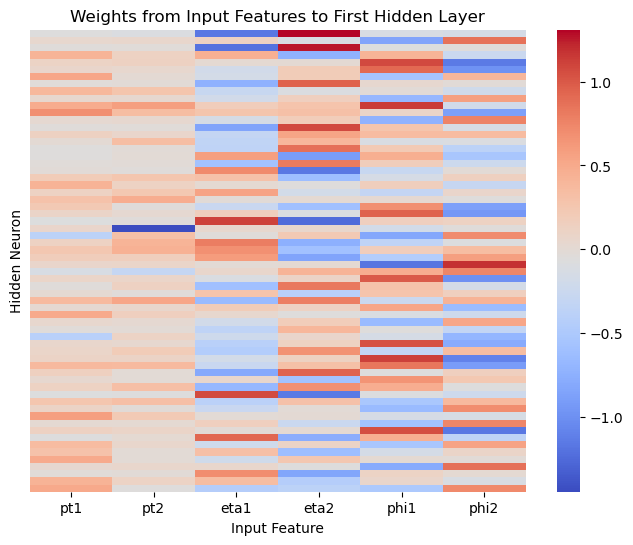

In [67]:
# Get weights from input layer
input_weights = model.net[0].weight.data.numpy()
print("Input layer weights shape:", input_weights.shape)

# Optionally, visualize weights as a heatmap
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(input_weights, cmap="coolwarm", xticklabels=features, yticklabels=False)
plt.title("Weights from Input Features to First Hidden Layer")
plt.xlabel("Input Feature")
plt.ylabel("Hidden Neuron")
plt.show()


## SHAP Values
Hey, remember learning about SHAP values. Let's see them in action here when trying to see what inputs were most influential.

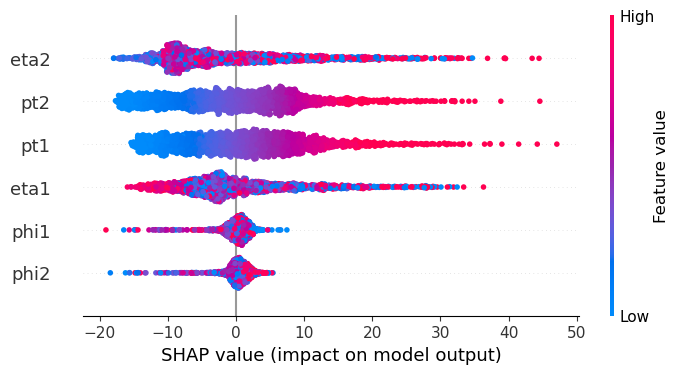

In [69]:
import shap
import torch
import numpy as np

# Define a wrapper for the PyTorch model to work with SHAP
def model_fn(x_numpy):
    x_tensor = torch.tensor(x_numpy, dtype=torch.float32)
    with torch.no_grad():
        return model(x_tensor).numpy()

# Use a subset of the training data as the SHAP background
explainer = shap.Explainer(model_fn, X_train, feature_names=features)

# Compute SHAP values on test data
shap_values = explainer(X_test)

# Summary plot (beeswarm)
shap.plots.beeswarm(shap_values)


## Learning Rate Determination?
There is a method to help determine the optimal learning rate. 

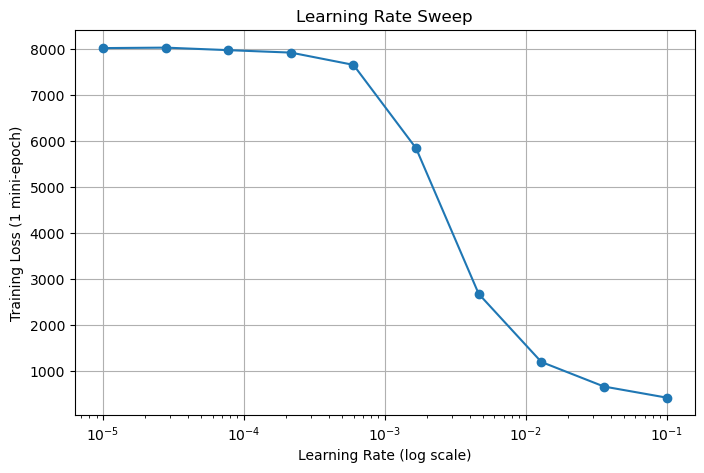

In [71]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt

# Define the model class
class ZMassRegressor(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(6, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )
    def forward(self, x):
        return self.net(x)

# Prepare data (reuse your X_train, y_train from earlier)
X_tensor = torch.tensor(X_train, dtype=torch.float32)
y_tensor = torch.tensor(y_train, dtype=torch.float32)
train_dataset = TensorDataset(X_tensor, y_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Try a range of learning rates
lrs = np.logspace(-5, -1, 10)
losses = []

for lr in lrs:
    model = ZMassRegressor()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    criterion = nn.MSELoss()
    
    model.train()
    total_loss = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    
    avg_loss = total_loss / len(train_loader)
    losses.append(avg_loss)

# Plot the results
plt.figure(figsize=(8, 5))
plt.semilogx(lrs, losses, marker='o')
plt.xlabel("Learning Rate (log scale)")
plt.ylabel("Training Loss (1 mini-epoch)")
plt.title("Learning Rate Sweep")
plt.grid(True)
plt.show()
